## Most Popular Products

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [34]:
raw_data = pd.read_excel("CoffeeShop.xlsx", "orders")
raw_data.info()
raw_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   row_id      521 non-null    int64         
 1   order_id    521 non-null    object        
 2   created_at  521 non-null    datetime64[ns]
 3   item_id     521 non-null    object        
 4   quantity    521 non-null    int64         
 5   cust_name   521 non-null    object        
 6   in_or_out   489 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 28.6+ KB


,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out
0,1,ORD001,2024-02-12 07:04:00,It008,1,Alex,out
1,2,ORD002,2024-02-12 07:09:00,It014,1,Jordan,in
2,3,ORD003,2024-02-12 07:14:00,It008,1,Taylor,out
3,4,ORD004,2024-02-12 07:18:00,It019,1,Casey,out
4,5,ORD005,2024-02-12 07:23:00,It024,1,Jamie,out
...,...,...,...,...,...,...,...
516,517,ORD433,2024-02-17 16:11:00,It023,1,Gina,in
517,518,ORD434,2024-02-17 16:27:00,It006,1,Hugh,out
518,519,ORD435,2024-02-17 16:43:00,It018,1,Iris,in
519,520,ORD436,2024-02-17 16:59:00,It002,1,Jack,out


In [35]:
def is_valid_item_id(item_id):
    return bool(re.match(r'^It0(0[1-9]|1[0-9]|2[0-3])$', item_id))

# Apply the function to filter valid item ids range(It001 to It023)
data = raw_data[raw_data['item_id'].apply(is_valid_item_id)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, 0 to 519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   row_id      447 non-null    int64         
 1   order_id    447 non-null    object        
 2   created_at  447 non-null    datetime64[ns]
 3   item_id     447 non-null    object        
 4   quantity    447 non-null    int64         
 5   cust_name   447 non-null    object        
 6   in_or_out   416 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.9+ KB


In [37]:
popular_products = data['item_id'].value_counts()
new_data = popular_products.reset_index()
new_data

,item_id,count
0,It005,27
1,It018,27
2,It009,26
3,It011,23
4,It014,22
5,It001,21
6,It020,21
7,It022,21
8,It012,20
9,It017,20


In [38]:
product_data = pd.read_excel("CoffeeShop.xlsx", "items")
merged_data = pd.merge(new_data,product_data, on='item_id')
merged_data

,item_id,count,sku,item_name,item_cat,item_size,item_price
0,It005,27,HDR-FLT,Flat White,Hot Drinks,NaN,£ 3.15
1,It018,27,CDR-CMO-LG,Cold Mocha,Cold Drinks,Large,£ 4.60
2,It009,26,HDR-MOC-MD,Mocha,Hot Drinks,Medium,£ 4.00
3,It011,23,HDR-WMO-MD,White Mocha,Hot Drinks,Medium,£ 4.50
4,It014,22,HDR-HCH-LG,Hot Chocolate,Hot Drinks,Large,£ 4.60
5,It001,21,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,£ 3.45
6,It020,21,CDR-ICT-LG,Iced Tea,Cold Drinks,Large,£ 3.55
7,It022,21,CDR-LMN-LG,Lemonade,Cold Drinks,Large,£ 3.75
8,It012,20,HDR-WMO-LG,White Mocha,Hot Drinks,Large,£ 4.70
9,It017,20,CDR-CMO-MD,Cold Mocha,Cold Drinks,Medium,£ 4.00


In [39]:
name_vs_frequency = merged_data.groupby('item_name')['count'].sum().reset_index()
name_vs_frequency

,item_name,count
0,Cappuccino,40
1,Caramel Macchiato,37
2,Cold Coffee,31
3,Cold Mocha,47
4,Espresso,19
5,Flat White,27
6,Hot Chocolate,35
7,Iced Tea,36
8,Latte,38
9,Lemonade,40


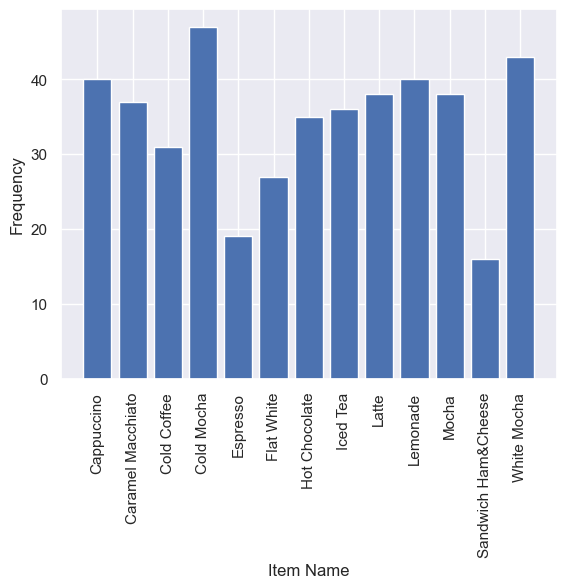

In [40]:
plt.bar(name_vs_frequency['item_name'],name_vs_frequency['count'])
plt.xlabel("Item Name")
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Cold Mocha is the Most Popular Product
